In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
df = yf.download('^GSPC',start='1900-03-01', proxy='127.0.0.1:7890')
df.drop(columns=['Volume'],inplace=True)
df['return'] = 100*df['Adj Close'].pct_change()
df['log_return'] = 100*(np.log2(df['Adj Close']) - np.log2(df['Adj Close'].shift(1)))
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,return,log_return
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0.566254,0.814627
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,-0.225230,-0.325305
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,-0.959368,-1.390758
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0.626784,0.901436
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,-0.906001,-1.313041
...,...,...,...,...,...,...,...
2022-03-28,4541.089844,4575.649902,4517.689941,4575.520020,4575.520020,0.714496,1.027134
2022-03-29,4602.859863,4637.299805,4589.660156,4631.600098,4631.600098,1.225655,1.757497
2022-03-30,4624.200195,4627.770020,4581.319824,4602.450195,4602.450195,-0.629370,-0.910858


In [5]:
# calculate the moving realized daily volatility
df['realized volatility'] = df['return'].rolling(22).std()
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,return,log_return,realized volatility
Date,,,,,,,,
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,-0.227655,-0.328811,0.746812
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,0.570442,0.820635,0.746972
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,-1.304592,-1.894513,0.794304
1928-02-06,17.450001,17.450001,17.450001,17.450001,17.450001,0.287363,0.413983,0.772743
1928-02-07,17.440001,17.440001,17.440001,17.440001,17.440001,-0.057308,-0.082702,0.758987
...,...,...,...,...,...,...,...,...
2022-03-28,4541.089844,4575.649902,4517.689941,4575.520020,4575.520020,0.714496,1.027134,1.482212
2022-03-29,4602.859863,4637.299805,4589.660156,4631.600098,4631.600098,1.225655,1.757497,1.434337
2022-03-30,4624.200195,4627.770020,4581.319824,4602.450195,4602.450195,-0.629370,-0.910858,1.443096


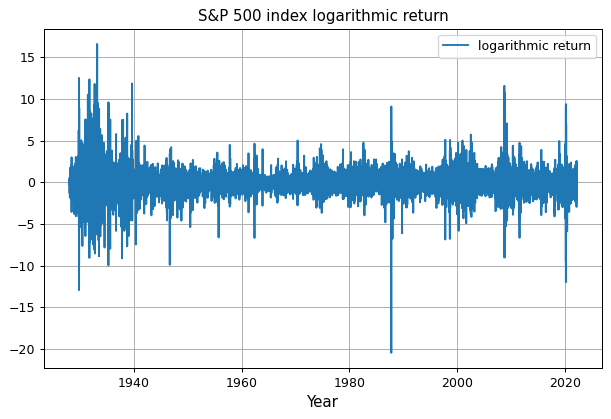

In [6]:
plt.figure(figsize=(8,5),dpi=90)
plt.grid()
plt.plot(df['return'],label='logarithmic return')
plt.xlabel('Year',{'fontsize':'large'})
plt.title('S&P 500 index logarithmic return')
plt.legend()
plt.show()

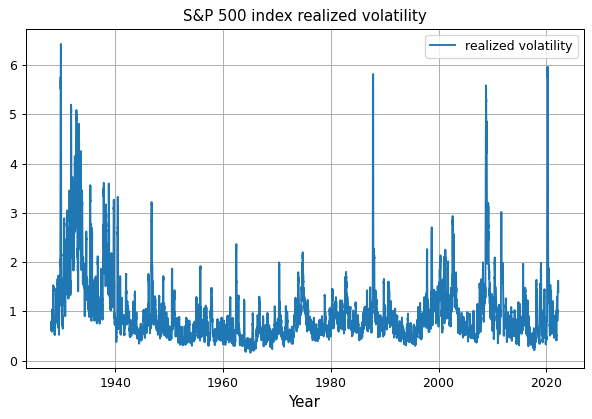

In [7]:
plt.figure(figsize=(8,5), dpi=90)
plt.grid()
plt.plot(df['realized volatility'],label='realized volatility')
plt.xlabel('Year',{'fontsize':'large'})
plt.title('S&P 500 index realized volatility')
plt.legend()

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+01,
        1.2000e+01, 3.4000e+01, 6.1000e+01, 1.7300e+02, 6.0200e+02,
        3.3060e+03, 1.3533e+04, 4.9150e+03, 7.0800e+02, 1.6400e+02,
        7.1000e+01, 1.8000e+01, 1.7000e+01, 9.0000e+00, 6.0000e+00,
        3.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-20.4669308 , -19.23104694, -17.99516308, -16.75927922,
        -15.52339536, -14.2875115 , -13.05162764, -11.81574378,
        -10.57985992,  -9.34397606,  -8.10809219,  -6.87220833,
         -5.63632447,  -4.40044061,  -3.16455675,  -1.92867289,
         -0.69278903,   0.54309483,   1.77897869,   3.01486255,
          4.25074641,   5.48663027,   6.72251413,   7.95839799,
          9.19428185,  10.43016571,  11.66604957,  12.90193343,
         14.13781729,  15.37370115,  16.60958501]),
 <BarContainer object of 30 artists>)

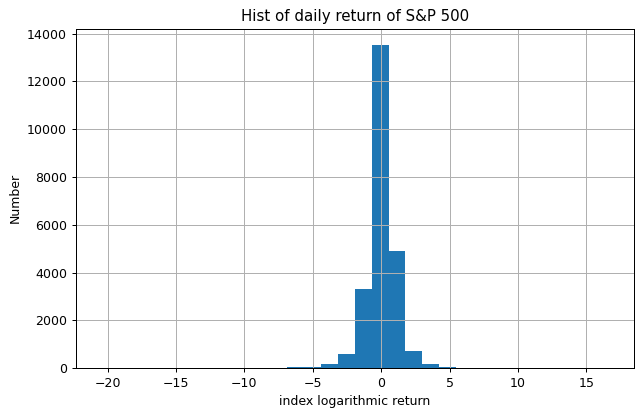

In [8]:
plt.figure(figsize=(8,5),dpi=90)
plt.grid()
plt.xlabel('index logarithmic return')
plt.ylabel('Number')
plt.title('Hist of daily return of S&P 500')
plt.hist(df['return'],bins=30)

In [9]:
# x_dim: the dimension of the input X
# time_steps: predict of n days
# if x_dim = 22, time steps = 1, it means we use X1 = [p1,p2,...,p22] to predict p23(y1)

def create_dataset(data, x_dim, time_steps):
    dataX, dataY = [], []
    for i in range(len(data) - x_dim - time_steps):
        dataX.append(data[i:(i + x_dim), 0])
        dataY.append(data[i + x_dim + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
data=np.array(df['realized volatility']).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)
data.shape

(23655, 1)

In [11]:
ratio = 0.8
Traindata = data[0:round(len(data)*ratio)]
Testdata = data[round(len(data)*ratio):]
Traindata.shape, Testdata.shape

((18924, 1), (4731, 1))

In [12]:
from sklearn.model_selection import train_test_split
time_steps = 1
x_dim = 22
X, y = create_dataset(Traindata, x_dim, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
print('Data size: {} Train size: {} Test size: {}'.format(X.shape[0], X_train.shape[0], X_test.shape[0]))

Data size: 18901 Train size: 17010 Test size: 1891


In [13]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_train.shape[1],1))
print('------------------------------------------------------')
print('X_train shape: {}'.format(X_train.shape))
print('------------------------------------------------------')
print('X_test shape: {}'.format(X_test.shape))

------------------------------------------------------
X_train shape: (17010, 22, 1)
------------------------------------------------------
X_test shape: (1891, 22, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(16, input_shape=(x_dim, 1), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae', 'mape','msle'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1, validation_split=2/9)
score = model.evaluate(X_train, y_train, batch_size=64, verbose=1)

Epoch 1/30


2022-04-04 00:44:57.657379: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


207/207 [==============================] - 2s 4ms/step - loss: 0.0046 - mae: 0.0382 - mape: 2704.9192 - msle: 0.0029 - val_loss: 0.0012 - val_mae: 0.0189 - val_mape: 17.4518 - val_msle: 6.5730e-04
Epoch 2/30
207/207 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0177 - mape: 1621.5331 - msle: 6.2238e-04 - val_loss: 6.9777e-04 - val_mae: 0.0149 - val_mape: 13.0113 - val_msle: 4.2207e-04
Epoch 3/30
207/207 [==============================] - 1s 3ms/step - loss: 8.3101e-04 - mae: 0.0157 - mape: 1233.9147 - msle: 5.0418e-04 - val_loss: 5.9542e-04 - val_mae: 0.0138 - val_mape: 12.3592 - val_msle: 3.6174e-04
Epoch 4/30
207/207 [==============================] - 1s 3ms/step - loss: 7.2495e-04 - mae: 0.0145 - mape: 1444.7679 - msle: 4.4226e-04 - val_loss: 5.4369e-04 - val_mae: 0.0131 - val_mape: 11.3906 - val_msle: 3.2781e-04
Epoch 5/30
207/207 [==============================] - 1s 3ms/step - loss: 6.7651e-04 - mae: 0.0141 - mape: 1202.0549 - msle: 4.1380e-04 - val_loss:

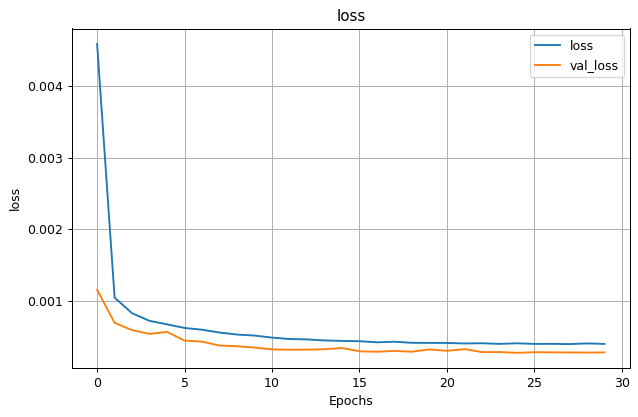

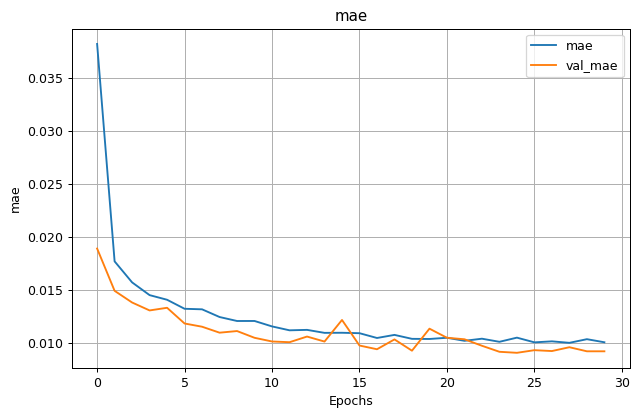

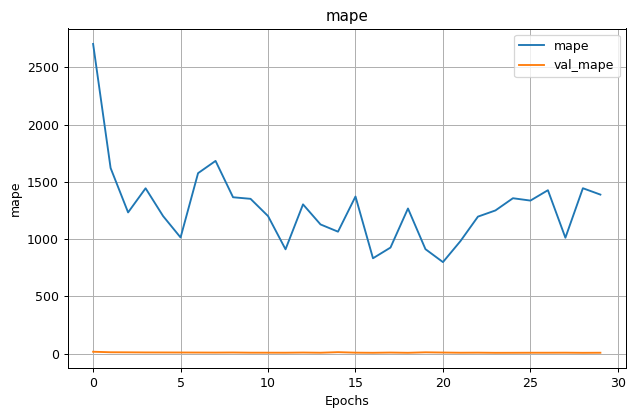

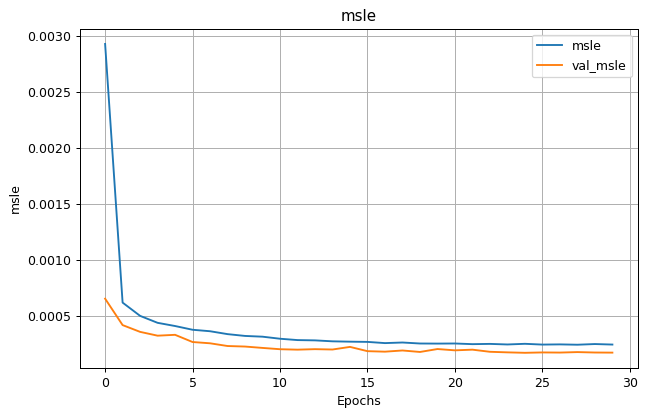

In [15]:
def visualize_loss(history, evaluation):
    train = history.history[evaluation]
    val = history.history['val_'+evaluation]
    epochs = range(len(train))
    plt.figure(figsize=(8,5),dpi=90)
    plt.plot(epochs, train, label=evaluation)
    plt.plot(epochs, val, label='val_'+evaluation)
    plt.title(evaluation)
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel(evaluation)
    plt.legend()
    plt.show()

for eva in ['loss','mae', 'mape','msle']:
    visualize_loss(history, eva)

In [16]:
Test_X, Test_y = create_dataset(Testdata, x_dim, time_steps)
Train_X, Train_y = create_dataset(Traindata, x_dim, time_steps)

In [17]:
Test_y_pre = model.predict(Test_X.reshape(Test_X.shape[0], Test_X.shape[1], 1))
Test_y_pre = scaler.inverse_transform(Test_y_pre)
Test_y = scaler.inverse_transform(Test_y.reshape(-1,1))

Train_y_pre = model.predict(Train_X.reshape(Train_X.shape[0], Train_X.shape[1], 1))
Train_y_pre = scaler.inverse_transform(Train_y_pre)
Train_y = scaler.inverse_transform(Train_y.reshape(-1,1))

In [18]:
index_train = df.index[x_dim+time_steps:round(len(data)*ratio)]
index_test = df.index[round(len(data)*ratio)+x_dim+time_steps:]

Test_y = pd.Series(Test_y.reshape(-1,), index=index_test)
Test_y_pre = pd.Series(Test_y_pre.reshape(-1,), index=index_test)

In [19]:
Train_y = pd.Series(Train_y.reshape(-1,), index=index_train)
Train_y_pre = pd.Series(Train_y_pre.reshape(-1,), index=index_train)

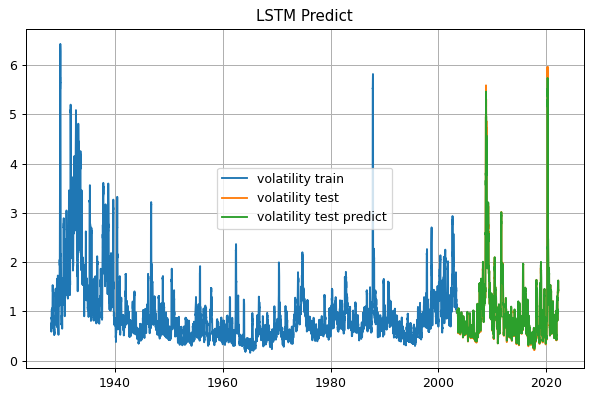

In [20]:
plt.figure(figsize=(8,5),dpi=90)

plt.grid()
plt.plot(Train_y,label='volatility train')
plt.plot(Test_y, label='volatility test')
plt.plot(Test_y_pre,label='volatility test predict')
plt.title('LSTM Predict')
plt.legend()

In [21]:
from sklearn import metrics
mse = metrics.mean_squared_error(Test_y, Test_y_pre)
mae = metrics.mean_absolute_error(Test_y, Test_y_pre)
r2 = metrics.r2_score(Test_y, Test_y_pre)
print('r2: {:.4f}%'.format(r2*100))
print('mean squared error: {:.4f}%'.format(mse*100))
print('mean absolute error: {:.4f}%'.format(mae*100))

r2: 98.0365%
mean squared error: 0.9860%
mean absolute error: 5.7232%
